In [1]:
### Import Libraries ###
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader.data as web
import datetime as dt
import fix_yahoo_finance as yf

In [2]:
### Set Date Period ###
start = dt.datetime(2016,1,1)
end = dt.datetime.now()

In [3]:
### Reading datas ###
yf.pdr_override()

# Read HSI - 恒生指數
hsi = pd.DataFrame()
hsi = web.get_data_yahoo('^HSI', start, end)

# Read HSCE - 國企指數
hsce = pd.DataFrame()
hsce = web.get_data_yahoo('^HSCE', start, end)

# Read 000001.SS - 上證綜合指數
shanghai = pd.DataFrame()
shanghai = web.get_data_yahoo('000001.SS', start, end)

# Read NASDAQ - 納斯達克指數
nasdaq = pd.DataFrame()
nasdaq = web.get_data_yahoo('^IXIC', start, end)

# Read DJI - 道瓊斯工業平均指數
dji = pd.DataFrame()
dji = web.get_data_yahoo('^DJI', start, end)

# Read SNP - 標普500指數
snp = pd.DataFrame()
snp = web.get_data_yahoo('^GSPC', start, end)

[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded


In [4]:
# Define a list of stock whom are HSI
stocks_list = pd.read_csv('HSIStocks.csv')
stocks_list = pd.DataFrame(data=stocks_list)

In [5]:
# Read List of stock
stocks = pd.DataFrame()
stocks = web.get_data_yahoo(stocks_list['Stock No'].values.tolist(), start, end)

[*********************100%***********************]  50 of 50 downloaded


In [6]:
stocks.head()

Open                                                        \
               0001.HK    0002.HK  0003.HK    0005.HK    0006.HK     0011.HK   
Date                                                                           
2016-01-04  104.099998  65.449997  11.3148  61.599998  70.550003  146.500000   
2016-01-05  104.400002  64.349998  11.1345  59.950001  69.050003  142.500000   
2016-01-06  104.000000  64.900002  11.2096  59.299999  70.000000  145.500000   
2016-01-07  102.599998  65.150002  11.0443  57.950001  69.300003  141.399994   
2016-01-08  100.900002  64.050003  11.2096  57.000000  70.000000  138.300003   

                                                       ...        Volume  \
              0012.HK    0016.HK 0017.HK    0019.HK    ...       2007.HK   
Date                                                   ...                 
2016-01-04  35.462101  93.599998    7.66  86.699997    ...      28089667   
2016-01-05  35.649899  93.000000    7.66  84.300003    ...      18935015   
2016-01-06  35.048801  93.650002    7.65  84.800003    ...      11441005   
2016-01-07  34.748299  92.099998    7.35  84.300003    ...      35680139   
2016-01-08  34.598000  91.400002    7.13  82.900002    ...      36647889   

                                                                       \
             2018.HK  2313.HK   2318.HK   2319.HK   2382.HK   2388.HK   
Date                                                                    
2016-01-04   2531874  1294089  45114145  12826499   2976865  11218041   
2016-01-05   3994537  3437608  48037712   8519584   4255269  12009264   
2016-01-06  10144539  2617768  34880806   8709479   5078000  11467101   
2016-01-07   9312067  3700856  74388997  14328800  12287801  17865549   
2016-01-08   5160749  4510936  58023171  10409299   5247079   9917406   

                                           
             2628.HK   3328.HK    3988.HK  
Date                                       
2016-01-04  53509566  38380357  367349425  
2016-01-05  35492596  61538070  244626082  
2016-01-06  37285331  43716806  299349246  
2016-01-07  84498372  71924839  580301935  
2016-01-08  54671607  54171432  537973193  

[5 rows x 300 columns]

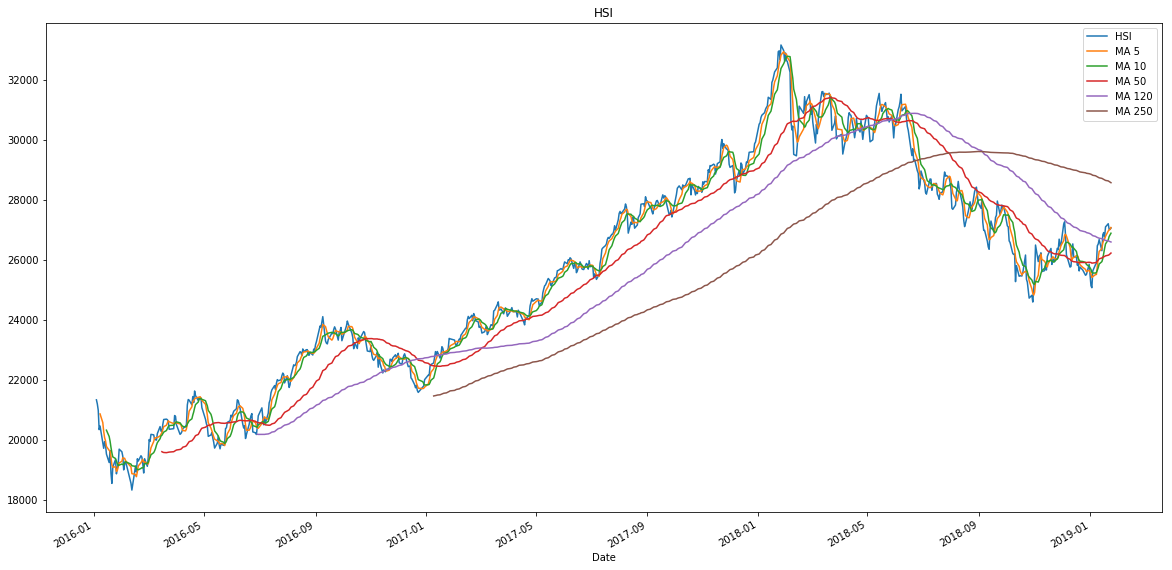

In [9]:
## Calculate each Index MA ##
# HSI
hsi['Total Traded'] = pd.Series(hsi['Open'] * hsi['Volume'], index=hsi.index)
hsi['MA 5'] = hsi['Close'].rolling(window=5).mean()
hsi['MA 10'] = hsi['Close'].rolling(window=10).mean()
hsi['MA 50'] = hsi['Close'].rolling(window=50).mean()
hsi['MA 120'] = hsi['Close'].rolling(window=120).mean()
hsi['MA 250'] = hsi['Close'].rolling(window=250).mean()

hsi['Close'].plot(label='HSI', figsize=(20,10))
hsi['MA 5'].plot(label='MA 5')
hsi['MA 10'].plot(label='MA 10')
hsi['MA 50'].plot(label='MA 50')
hsi['MA 120'].plot(label='MA 120')
hsi['MA 250'].plot(label='MA 250')

plt.title('HSI')
plt.legend()

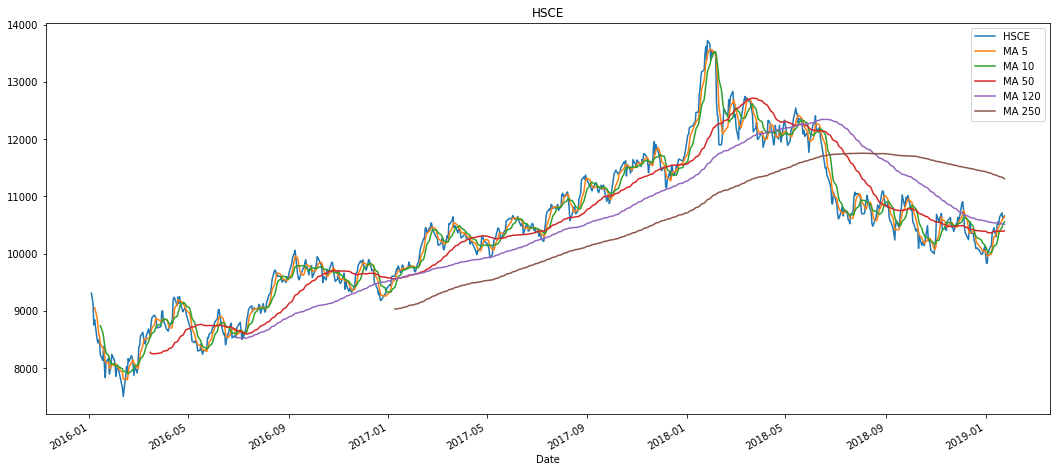

In [10]:
# HSCE
hsce['Total Traded'] = pd.Series(hsce['Open'] * hsce['Volume'], index=hsce.index)
hsce['MA 5'] = hsce['Close'].rolling(window=5).mean()
hsce['MA 10'] = hsce['Close'].rolling(window=10).mean()
hsce['MA 50'] = hsce['Close'].rolling(window=50).mean()
hsce['MA 120'] = hsce['Close'].rolling(window=120).mean()
hsce['MA 250'] = hsce['Close'].rolling(window=250).mean()

hsce['Close'].plot(label='HSCE', figsize=(18,8))
hsce['MA 5'].plot(label='MA 5')
hsce['MA 10'].plot(label='MA 10')
hsce['MA 50'].plot(label='MA 50')
hsce['MA 120'].plot(label='MA 120')
hsce['MA 250'].plot(label='MA 250')

plt.title('HSCE')
plt.legend()

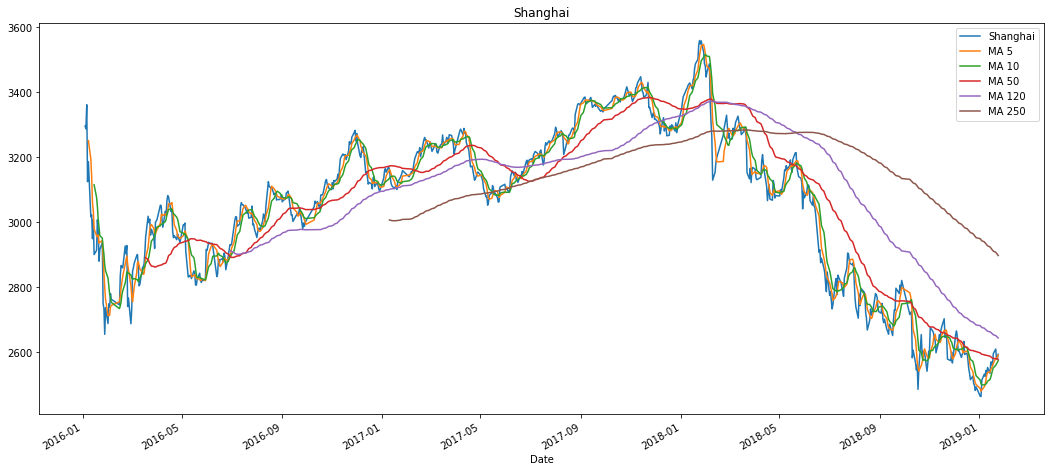

In [11]:
# Shanghai
shanghai['Total Traded'] = pd.Series(shanghai['Open'] * shanghai['Volume'], index=shanghai.index)
shanghai['MA 5'] = shanghai['Close'].rolling(window=5).mean()
shanghai['MA 10'] = shanghai['Close'].rolling(window=10).mean()
shanghai['MA 50'] = shanghai['Close'].rolling(window=50).mean()
shanghai['MA 120'] = shanghai['Close'].rolling(window=120).mean()
shanghai['MA 250'] = shanghai['Close'].rolling(window=250).mean()

shanghai['Close'].plot(label='Shanghai', figsize=(18,8))
shanghai['MA 5'].plot(label='MA 5')
shanghai['MA 10'].plot(label='MA 10')
shanghai['MA 50'].plot(label='MA 50')
shanghai['MA 120'].plot(label='MA 120')
shanghai['MA 250'].plot(label='MA 250')

plt.title('Shanghai')
plt.legend()

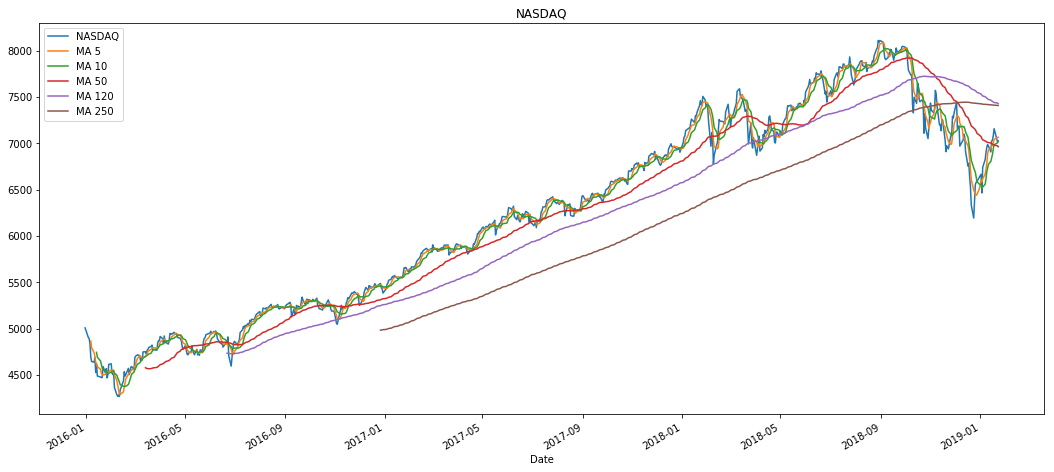

In [12]:
# NASDAQ
nasdaq['Total Traded'] = pd.Series(nasdaq['Open'] * nasdaq['Volume'], index=nasdaq.index)
nasdaq['MA 5'] = nasdaq['Close'].rolling(window=5).mean()
nasdaq['MA 10'] = nasdaq['Close'].rolling(window=10).mean()
nasdaq['MA 50'] = nasdaq['Close'].rolling(window=50).mean()
nasdaq['MA 120'] = nasdaq['Close'].rolling(window=120).mean()
nasdaq['MA 250'] = nasdaq['Close'].rolling(window=250).mean()

nasdaq['Close'].plot(label='NASDAQ', figsize=(18,8))
nasdaq['MA 5'].plot(label='MA 5')
nasdaq['MA 10'].plot(label='MA 10')
nasdaq['MA 50'].plot(label='MA 50')
nasdaq['MA 120'].plot(label='MA 120')
nasdaq['MA 250'].plot(label='MA 250')

plt.title('NASDAQ')
plt.legend()

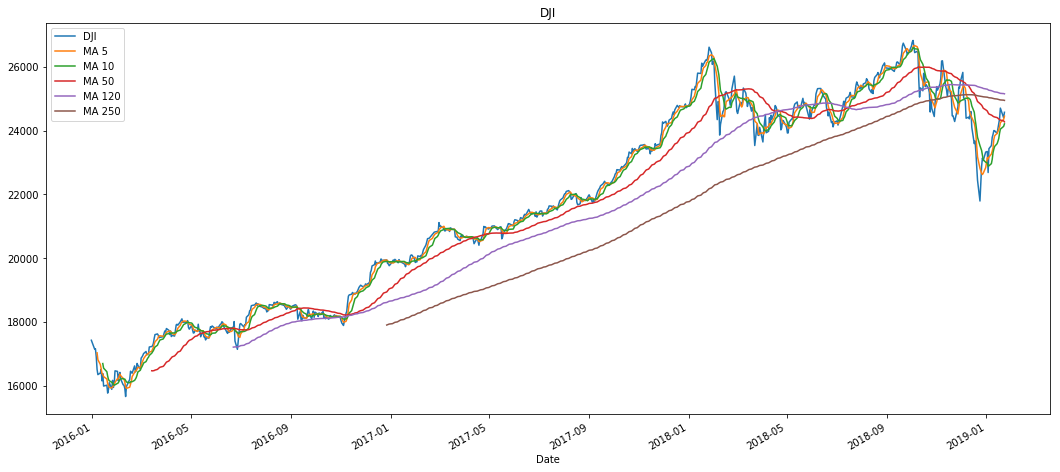

In [13]:
# DJI
dji['Total Traded'] = pd.Series(dji['Open'] * dji['Volume'], index=dji.index)
dji['MA 5'] = dji['Close'].rolling(window=5).mean()
dji['MA 10'] = dji['Close'].rolling(window=10).mean()
dji['MA 50'] = dji['Close'].rolling(window=50).mean()
dji['MA 120'] = dji['Close'].rolling(window=120).mean()
dji['MA 250'] = dji['Close'].rolling(window=250).mean()

dji['Close'].plot(label='DJI', figsize=(18,8))
dji['MA 5'].plot(label='MA 5')
dji['MA 10'].plot(label='MA 10')
dji['MA 50'].plot(label='MA 50')
dji['MA 120'].plot(label='MA 120')
dji['MA 250'].plot(label='MA 250')

plt.title('DJI')
plt.legend()

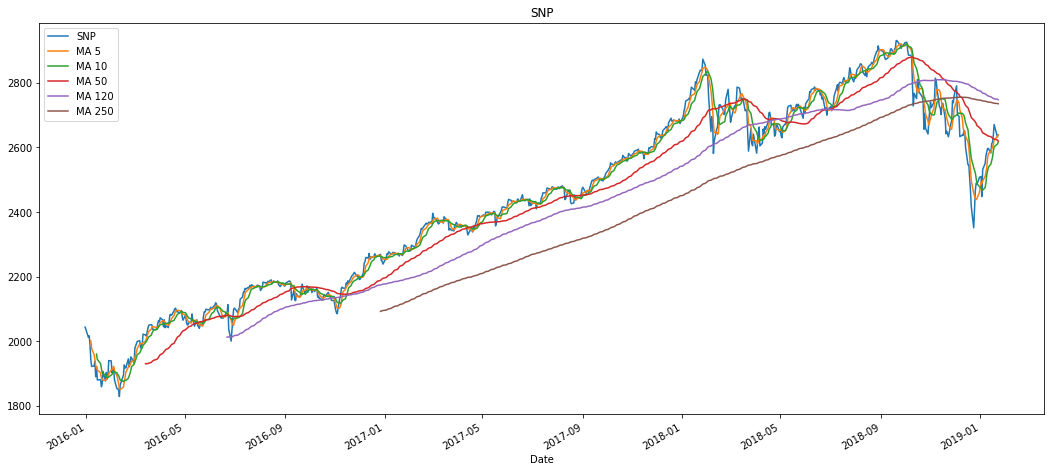

In [14]:
# SNP
snp['Total Traded'] = pd.Series(snp['Open'] * snp['Volume'], index=snp.index)
snp['MA 5'] = snp['Close'].rolling(window=5).mean()
snp['MA 10'] = snp['Close'].rolling(window=10).mean()
snp['MA 50'] = snp['Close'].rolling(window=50).mean()
snp['MA 120'] = snp['Close'].rolling(window=120).mean()
snp['MA 250'] = snp['Close'].rolling(window=250).mean()

snp['Close'].plot(label='SNP', figsize=(18,8))
snp['MA 5'].plot(label='MA 5')
snp['MA 10'].plot(label='MA 10')
snp['MA 50'].plot(label='MA 50')
snp['MA 120'].plot(label='MA 120')
snp['MA 250'].plot(label='MA 250')

plt.title('SNP')
plt.legend()

In [67]:
stock_all = stocks.copy()

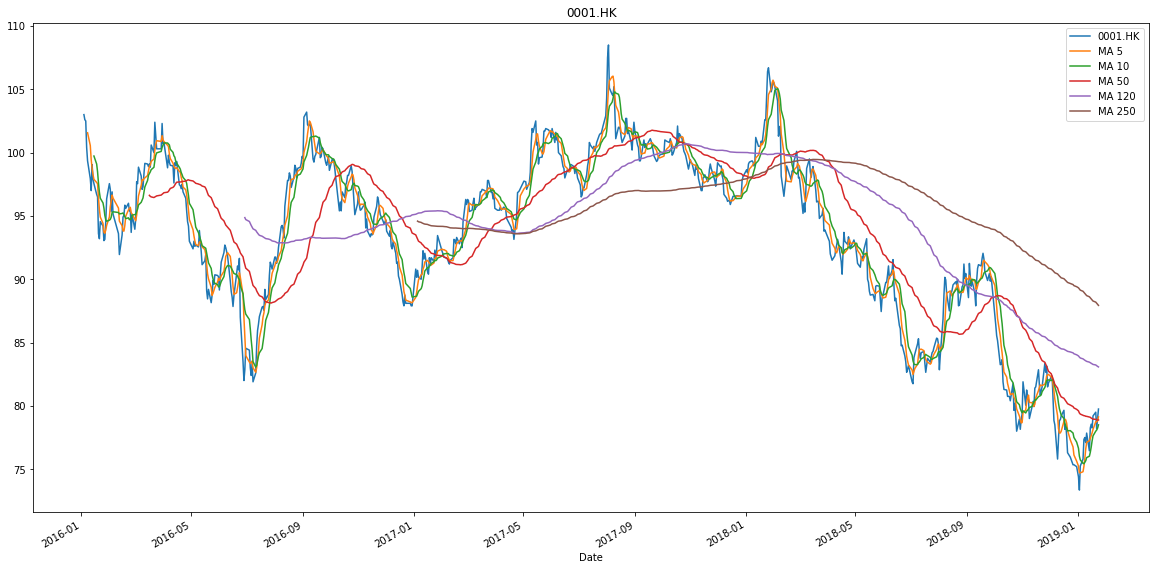

In [15]:
stock_0001 = pd.DataFrame()
stock_0001['Open'] = stocks['Open']['0001.HK']
stock_0001['Close'] = stocks['Close']['0001.HK']
stock_0001['Adj Close'] = stocks['Adj Close']['0001.HK']
stock_0001['Low'] = stocks['Low']['0001.HK']
stock_0001['High'] = stocks['High'] ['0001.HK']
stock_0001['Volume'] = stocks['Volume']['0001.HK']

stock_0001['Total Traded'] = pd.Series(stock_0001['Open'] * stock_0001['Volume'], index=stock_0001.index)
stock_0001['Return'] = stock_0001['Close'].pct_change()
stock_0001['Cumulative Return'] = (1 + stock_0001['Return']).cumprod()

stock_0001['MA 5'] = stock_0001['Close'].rolling(window=5).mean()
stock_0001['MA 10'] = stock_0001['Close'].rolling(window=10).mean()
stock_0001['MA 50'] = stock_0001['Close'].rolling(window=50).mean()
stock_0001['MA 120'] = stock_0001['Close'].rolling(window=120).mean()
stock_0001['MA 250'] = stock_0001['Close'].rolling(window=250).mean()

stock_0001['Close'].plot(label='0001.HK', figsize=(20,10))
stock_0001['MA 5'].plot(label='MA 5')
stock_0001['MA 10'].plot(label='MA 10')
stock_0001['MA 50'].plot(label='MA 50')
stock_0001['MA 120'].plot(label='MA 120')
stock_0001['MA 250'].plot(label='MA 250')

plt.title('0001.HK')
plt.legend()

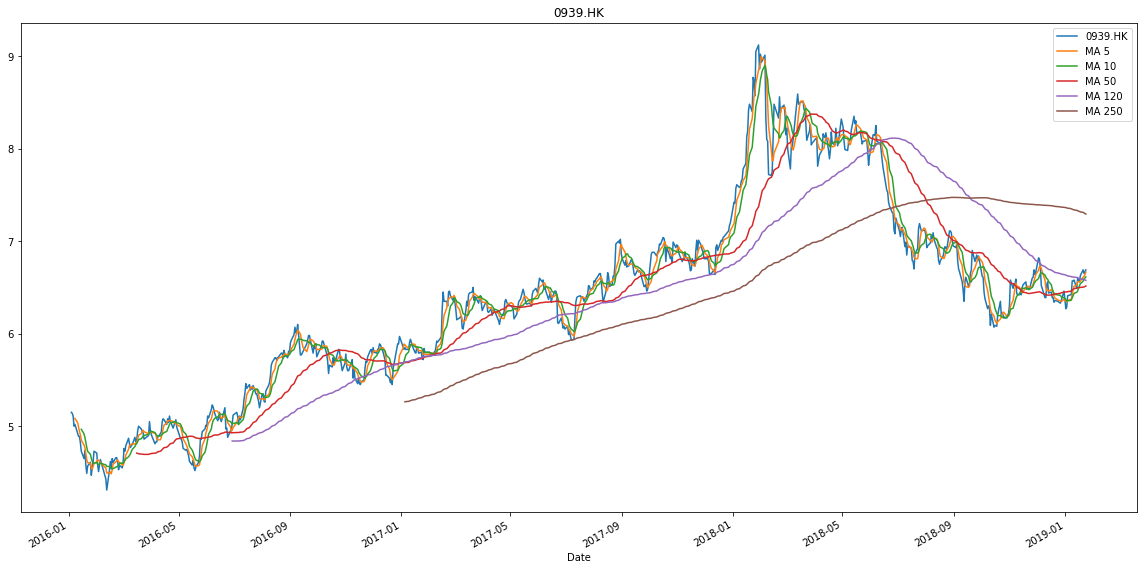

In [16]:
stock_0939 = pd.DataFrame()
stock_0939['Open'] = stocks['Open']['0939.HK']
stock_0939['Close'] = stocks['Close']['0939.HK']
stock_0939['Adj Close'] = stocks['Adj Close']['0939.HK']
stock_0939['Low'] = stocks['Low']['0939.HK']
stock_0939['High'] = stocks['High'] ['0939.HK']
stock_0939['Volume'] = stocks['Volume']['0939.HK']

stock_0939['Total Traded'] = pd.Series(stock_0939['Open'] * stock_0939['Volume'], index=stock_0939.index)
stock_0939['Return'] = stock_0939['Close'].pct_change()
stock_0939['Cumulative Return'] = (1 + stock_0939['Return']).cumprod()

stock_0939['MA 5'] = stock_0939['Close'].rolling(window=5).mean()
stock_0939['MA 10'] = stock_0939['Close'].rolling(window=10).mean()
stock_0939['MA 50'] = stock_0939['Close'].rolling(window=50).mean()
stock_0939['MA 120'] = stock_0939['Close'].rolling(window=120).mean()
stock_0939['MA 250'] = stock_0939['Close'].rolling(window=250).mean()

stock_0939['Close'].plot(label='0939.HK', figsize=(20,10))
stock_0939['MA 5'].plot(label='MA 5')
stock_0939['MA 10'].plot(label='MA 10')
stock_0939['MA 50'].plot(label='MA 50')
stock_0939['MA 120'].plot(label='MA 120')
stock_0939['MA 250'].plot(label='MA 250')

plt.title('0939.HK')
plt.legend()

In [18]:
stock_all = stocks.copy()

# Create the basic datas for each stocks
for x in range(0, len(stock_all['Open'].columns)):
    stock_name = stock_all['Open'].columns[x]
    stock_all['Total Traded', stock_name] = pd.Series(stock_all['Open'][stock_name] * stock_all['Volume'][stock_name], index=stock_all.index)
    stock_all['Return', stock_name] = stock_all['Close'][stock_name].pct_change()
    stock_all['Cumulative Return', stock_name] = (1 + stock_all['Return'][stock_name]).cumprod()
    stock_all['MA 5', stock_name] = stock_all['Close'][stock_name].rolling(window=5).mean()
    stock_all['MA 10', stock_name] = stock_all['Close'][stock_name].rolling(window=10).mean()
    stock_all['MA 50', stock_name] = stock_all['Close'][stock_name].rolling(window=50).mean()
    stock_all['MA 120', stock_name] = stock_all['Close'][stock_name].rolling(window=120).mean()
    stock_all['MA 250', stock_name] = stock_all['Close'][stock_name].rolling(window=250).mean()

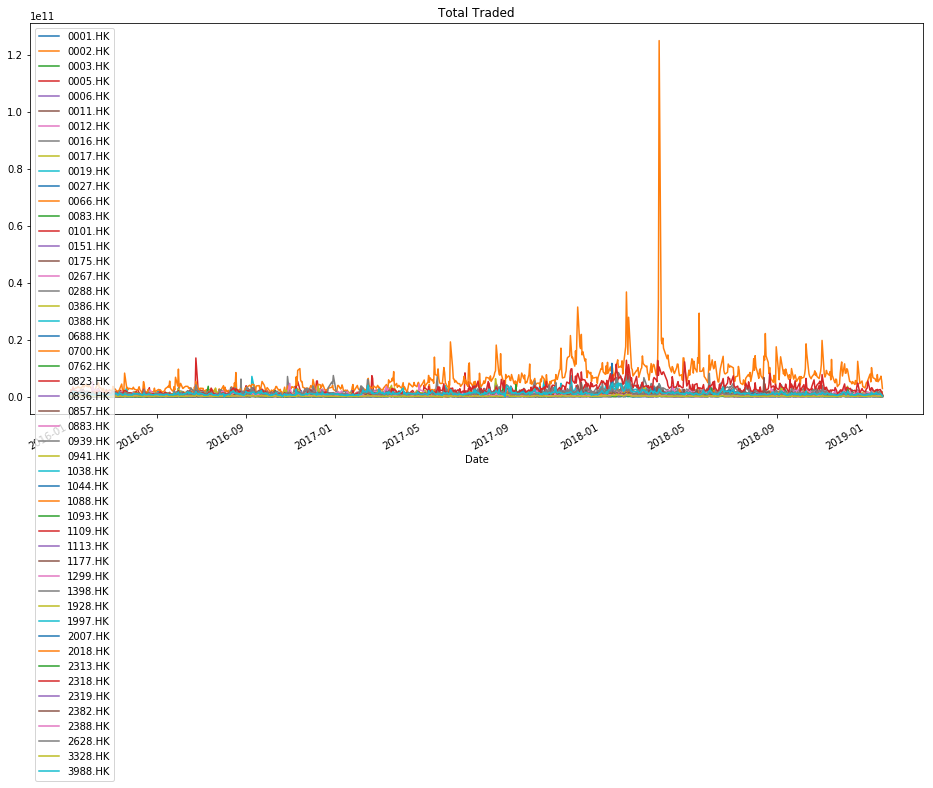

In [19]:
# Create the plot to display all stocks Total Traded
for x in range(0, len(stock_all['Open'].columns)):
    stock_name = stock_all['Open'].columns[x]
    stock_all['Total Traded'][stock_name].plot(label=stock_name, figsize=(16,8))

plt.xlabel('Date')
plt.title('Total Traded')
plt.legend()

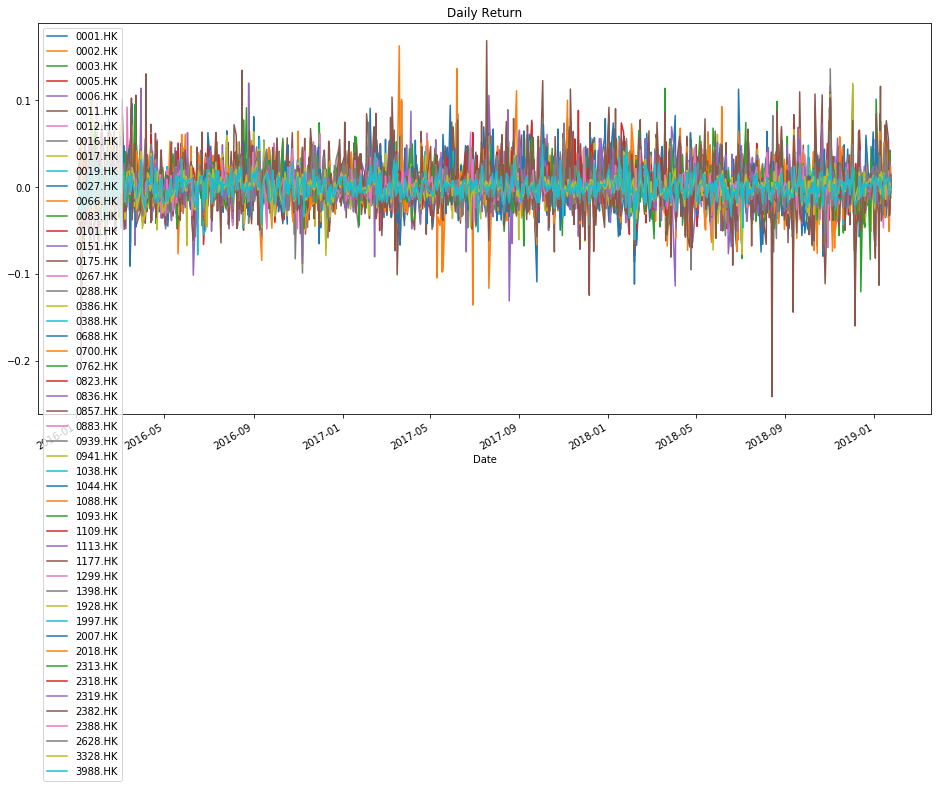

In [20]:
# Create the plot to display the Daily Return
for x in range(0, len(stock_all['Open'].columns)):
    stock_name = stock_all['Open'].columns[x]
    stock_all['Return'][stock_name].plot(label=stock_name, figsize=(16,8))

plt.xlabel('Date')
plt.title('Daily Return')
plt.legend()

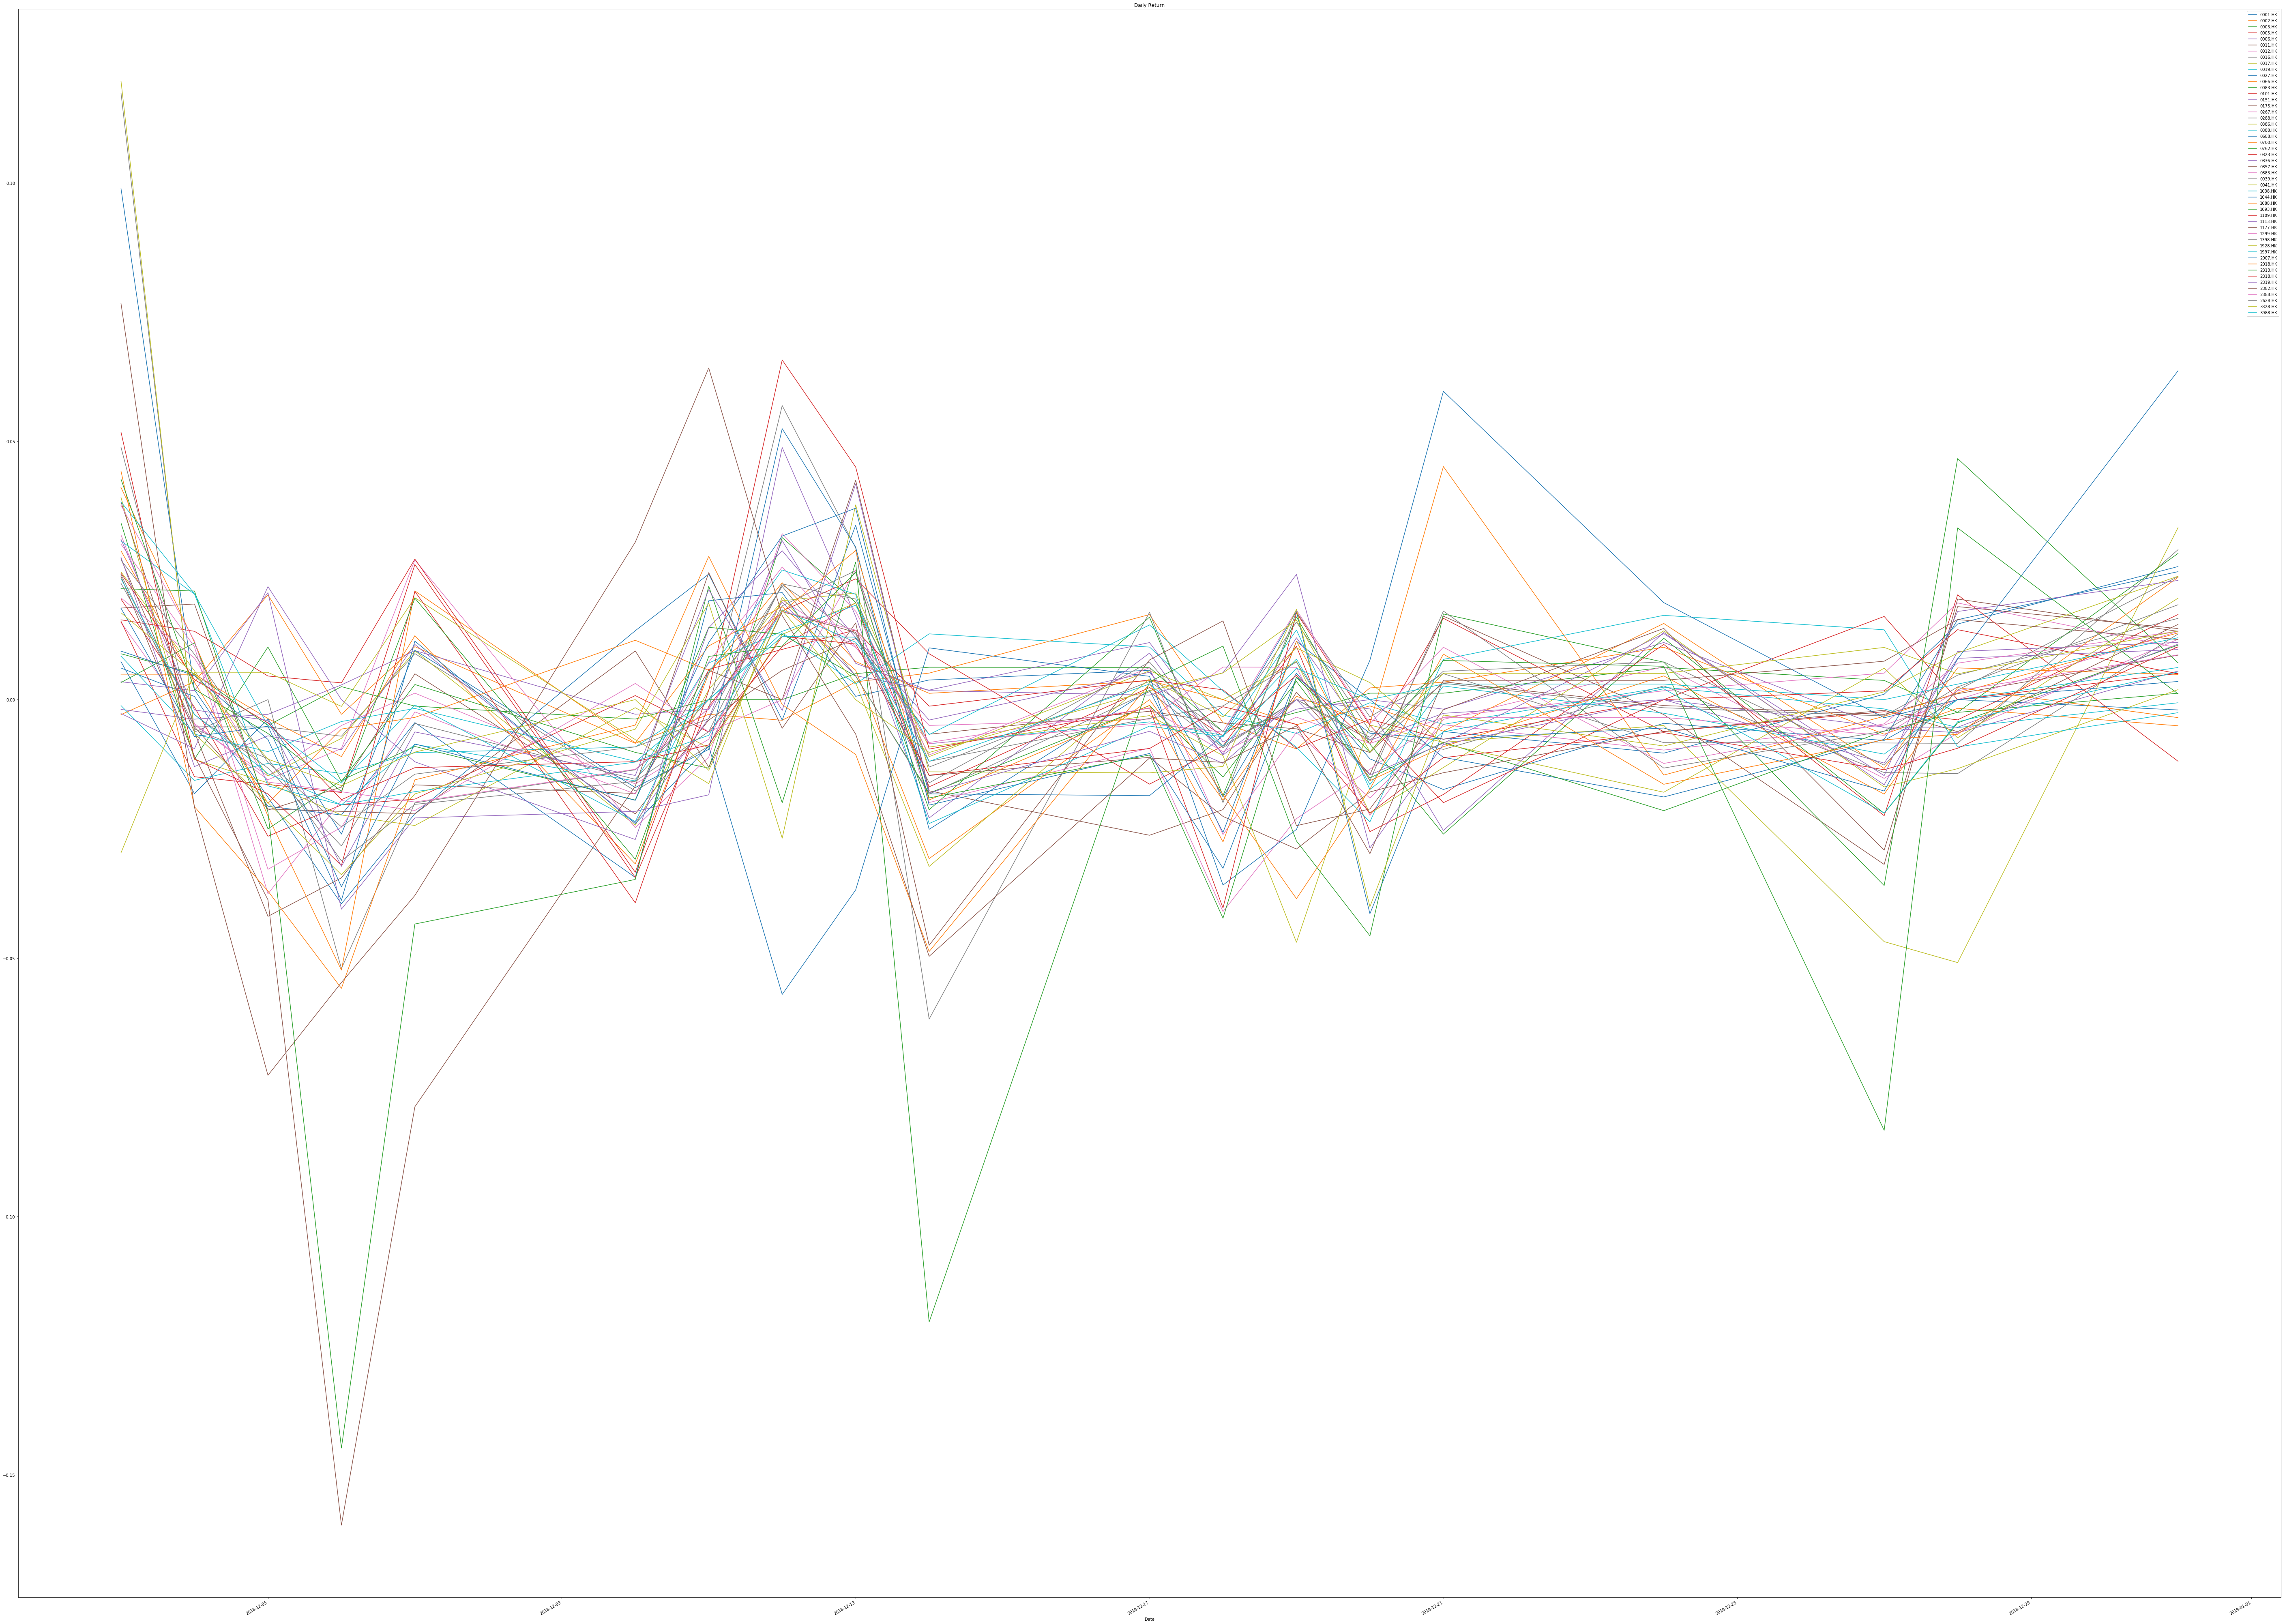

In [30]:
# Create the plot to display the Daily Return in 2018 with Date Range
date_start = dt.datetime(2018,12,1)
date_end = dt.datetime(2019,1,1)

for x in range(0, len(stock_all['Open'].columns)):
    stock_name = stock_all['Open'].columns[x]
    stock_all['Return'][stock_name][(stock_all.index >= date_start) & (stock_all.index < date_end)].plot(label=stock_name, figsize=(100,80))

plt.xlabel('Date')
plt.title('Daily Return')
plt.legend()
plt.savefig('Daily Return.png')

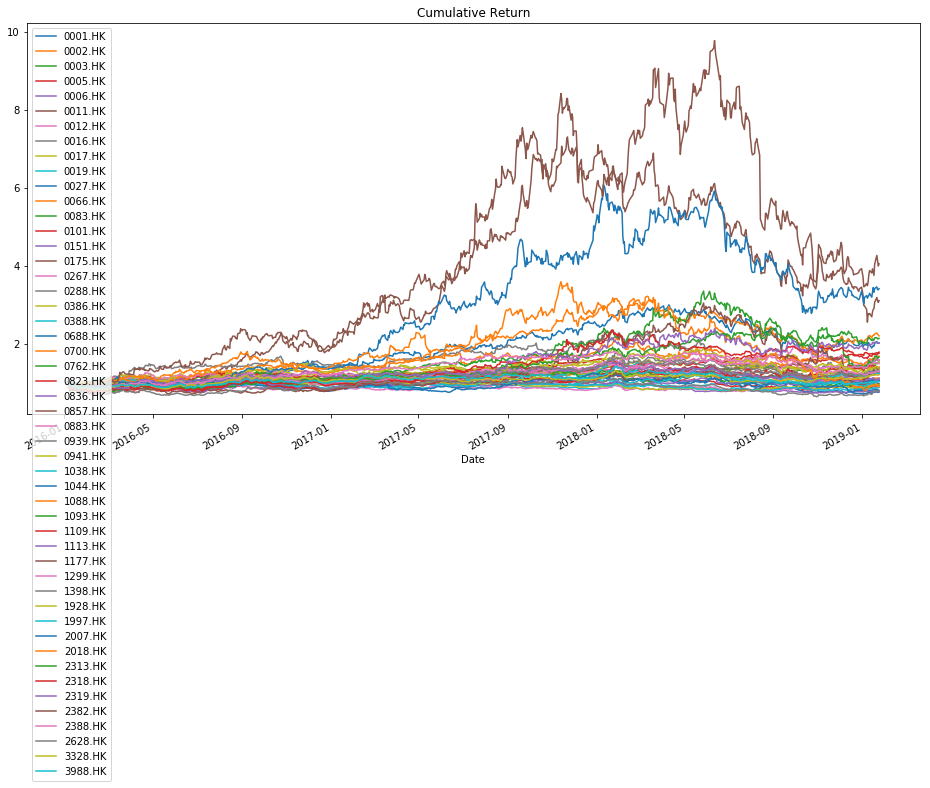

In [21]:
# Create the plot to display the Cumulative Return
for x in range(0, len(stock_all['Open'].columns)):
    stock_name = stock_all['Open'].columns[x]
    stock_all['Cumulative Return'][stock_name].plot(label=stock_name, figsize=(16,8))

plt.xlabel('Date')
plt.title('Cumulative Return')
plt.legend()

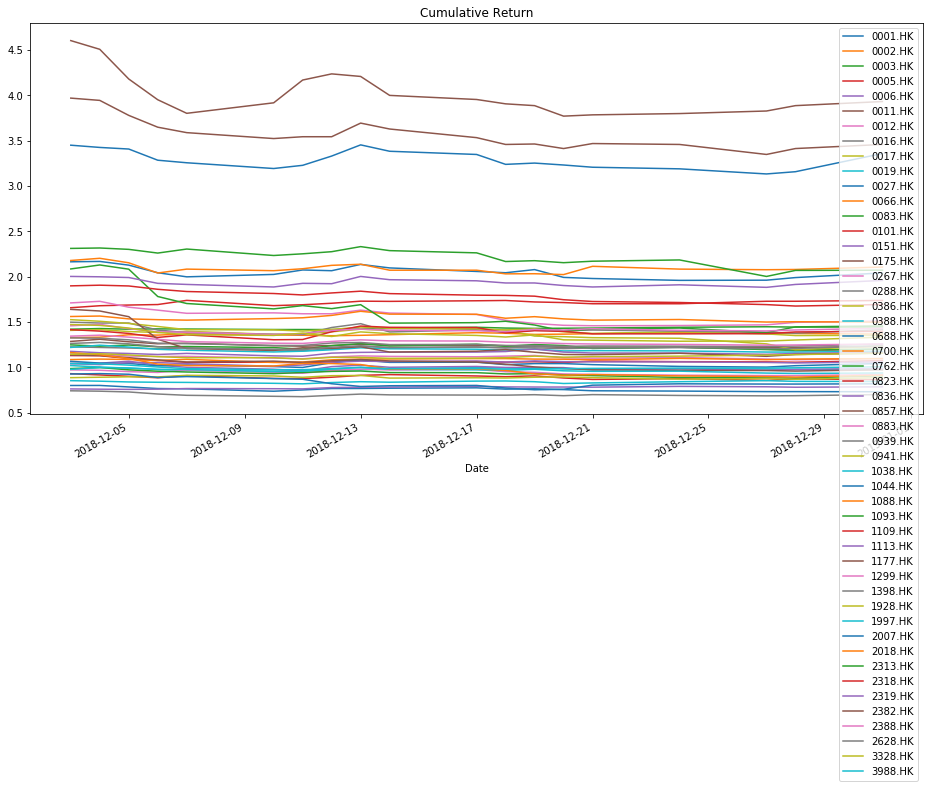

In [31]:
# Create the plot to display the Cumulative Return
for x in range(0, len(stock_all['Open'].columns)):
    stock_name = stock_all['Open'].columns[x]
    stock_all['Cumulative Return'][stock_name][(stock_all.index >= date_start) & (stock_all.index < date_end)].plot(label=stock_name, figsize=(16,8))

plt.xlabel('Date')
plt.title('Cumulative Return')
plt.legend()
plt.savefig('CumulativeReturn.png')